# Regularisation, Parameter Initialisation, Batchnorm, Optimisers

Create and compare different models (as described below).

Inspect the results by using tensorboard.


In [1]:
import tensorflow as tf
import datetime
import os

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Parameters


In [3]:
layersizes = [50,50,50,10]
batchsize = 32 
epochs = 20
learning_rate = 0.1

tensorboard_folder = "tb_logs_keras"
outdir = os.path.join(os.getcwd(), tensorboard_folder)

### Baseline Model

* No regularisation
* No Batch Norm
* Default parameter initialisation of Keras: What is the default?
* Sigmoid activation (last layer always softmax)
* SGD with given batchsize and learning rate, no accelerators (no momentum nor RMS prop).

Now, create the baseline model. 

Possibly, add convenient naming to the layers so that you can more easily read the outputs in tensorboard. 

In [4]:
def baseline_model(layersizes, activation):
    """
    Provides an MLP model (using Sequential) with given layersizes. The last layer is a softmax layer.
    As activation function use sigmoid.
        
    Arguments:
    layersizes -- list of integers with the number of hidden units per layer. The last element is for MNIST 10.
    activation -- string specifying the activation function for the hidden layers to be used.
    
    """
    ### START YOUR CODE HERE ###

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    model.add(tf.keras.layers.Dense(units=layersizes[0],
                                    use_bias=True,
                                    activation=activation,
                                    name='Layer_{}'.format(0)))
    
    for i, ls in enumerate(layersizes[1:-1]):
        model.add(tf.keras.layers.Dense(units=ls,
                                        use_bias=True,
                                        activation=activation,
                                        name='Layer_{}'.format(i+1)))
    
    model.add(tf.keras.layers.Dense(units=layersizes[-1],
                                    use_bias=True,
                                    activation='softmax',
                                    name='Layer_{}'.format(len(layersizes)-1)))
    
    ### STOP YOUR CODE HERE ###

    return model

In [5]:
model = baseline_model(layersizes, 'sigmoid')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Layer_0 (Dense)              (None, 50)                39250     
_________________________________________________________________
Layer_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
Layer_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
Layer_3 (Dense)              (None, 10)                510       
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________


#### Run model

Use cross entropy as loss function.

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
run_name = "baseline"
rundir = os.path.join(outdir, run_name)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=rundir, histogram_freq=1, profile_batch=0)
# start tensorboard on command line with tensorboard -logs <path to outdir> 


### START YOUR CODE HERE ###
""""
Use this sparse_categorical_crossentropy loss function when there
are two or more label classes. We expect labels to be provided
as integers. If you want to provide labels using one-hot
representation, please use CategoricalCrossentropy loss.
"""
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

### STOP YOUR CODE HERE ###


Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3165 - accuracy: 0.1015 - val_loss: 2.2966 - val_accuracy: 0.1314
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2954 - accuracy: 0.1262 - val_loss: 2.2878 - val_accuracy: 0.2662
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2850 - accuracy: 0.1669 - val_loss: 2.2697 - val_accuracy: 0.1840
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2631 - accuracy: 0.2180 - val_loss: 2.2233 - val_accuracy: 0.3300
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1980 - accuracy: 0.3315 - val_loss: 2.0544 - val_accuracy: 0.3965
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9775 - accuracy: 0.4025 - val_loss: 1.6747 - val_accuracy: 0.4714
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6041 - accuracy: 0.4785 - val_loss: 1.3707 - val_accuracy:

#### OUTPUTs

Provide here suitable plots and comments:

* Learning curves: train / test accuracy and loss


In [9]:
for key, value in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


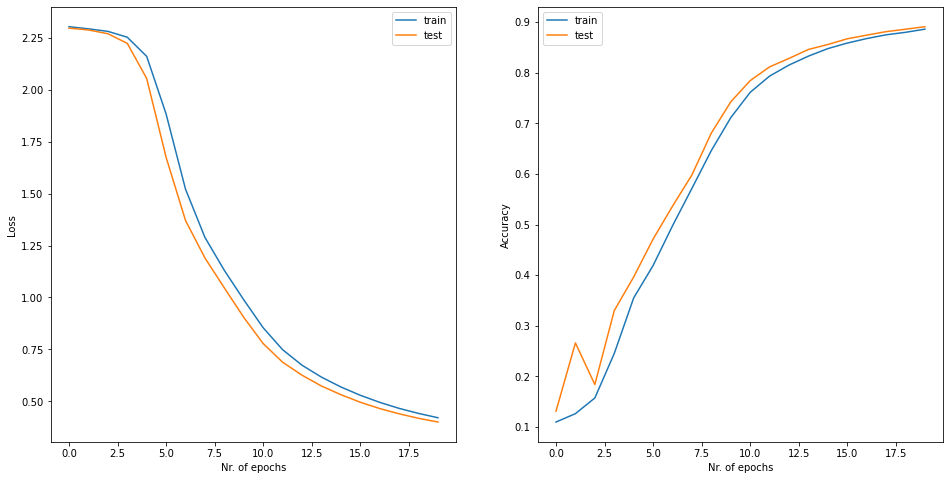

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##### Conclusion from the plots above
The loss starts with a rather high value and decreases significantly over time/number of epochs. A similar behaviour can be observed in the accuracy plot, the accuracy starts with a rather low value and increases significantly over time/number of epochs. These are very nice plots, which indicates perfectly, that our model does not suffer from high bias, nor high variance and is not fully converging, which indicates, that our model would highly benefit from longer training sessions/larger number of epochs. Still, it is expected, that the accuracy will not exceed 95% with this model. Let's stay curious and try to exploit further possibilites in the followoing sections.

### Parameter Initialisation

* No regularisation
* No Batch Norm
* __Parameter Initialisation: Compare GlorotNormal, Random Normal (mean 0, stdev 1), Zero, HeNormal__
* __Sigmoid Activation (last layer always softmax): Compare Sigmoid, ReLu__
* SGD with given batchsize and learning rate, no accelerators (no momentum nor RMS prop).

Hence, for each of the 4 initializers train and test a model sigmoid and relu.

In [11]:
def model_param_init(layersizes, initializer, activation):
    """
    Provides an MLP model (using Sequential) with given layersizes. The last layer is a softmax layer.
    As activation function use sigmoid.
        
    Arguments:
    layersizes -- list of integers with the number of hidden units per layer. The last element is for MNIST 10.
    initializer -- weight initializer
    activation -- string specifying the activation function to be used.
    
    """
    ### START YOUR CODE HERE ###

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    model.add(tf.keras.layers.Dense(units=layersizes[0],
                                    kernel_initializer=initializer,
                                    bias_initializer=initializer,
                                    use_bias=True,
                                    activation=activation,
                                    name='Layer_{}'.format(0)))
    
    for i, ls in enumerate(layersizes[1:-1]):
        model.add(tf.keras.layers.Dense(units=ls,
                                    kernel_initializer=initializer,
                                    bias_initializer=initializer,
                                        use_bias=True,
                                        activation=activation,
                                        name='Layer_{}'.format(i+1)))
    
    model.add(tf.keras.layers.Dense(units=layersizes[-1],
                                    kernel_initializer=initializer,
                                    bias_initializer=initializer,
                                    use_bias=True,
                                    activation='softmax',
                                    name='Layer_{}'.format(len(layersizes)-1)))
    
    ### STOP YOUR CODE HERE ###

    return model

#### Run model

Run with the different settings.
Don't forget to configure the proper tensorboard callback.

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3024 - accuracy: 0.1099 - val_loss: 2.3031 - val_accuracy: 0.1010
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3020 - accuracy: 0.1087 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3025 - accuracy: 0.1051 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3022 - accuracy: 0.1109 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3022 - accuracy: 0.1111 - val_loss: 2.3016 - val_accuracy: 0.1032
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3022 - accuracy: 0.1085 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3016 - accuracy: 0.1118 - val_loss: 2.3015 - val_accuracy:

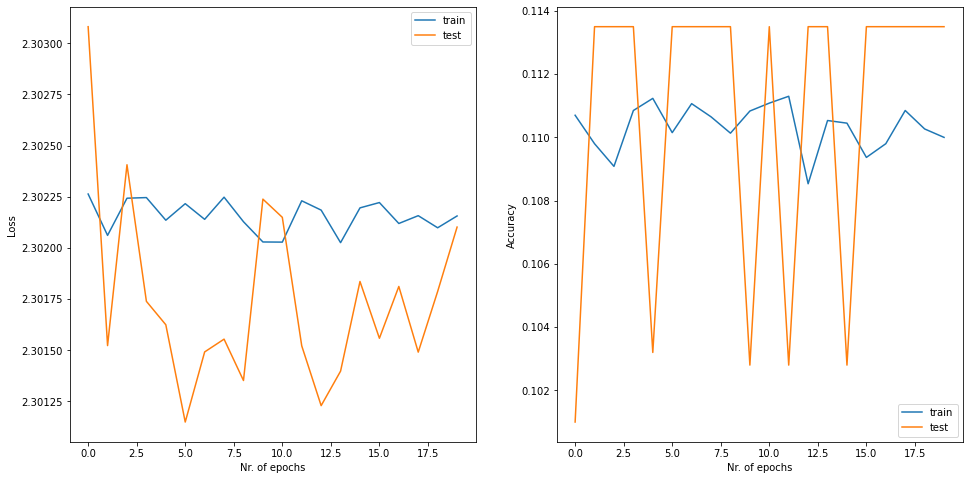

In [12]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.Zeros(), 'sigmoid')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3020 - accuracy: 0.1112 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3013 - accuracy: 0.1113 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3014 - accuracy: 0.1127 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3014 - accuracy: 0.1102 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3015 - accuracy: 0.1112 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3012 - accuracy: 0.1115 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3015 - accuracy: 0.1101 - val_loss: 2.3010 - val_accuracy:

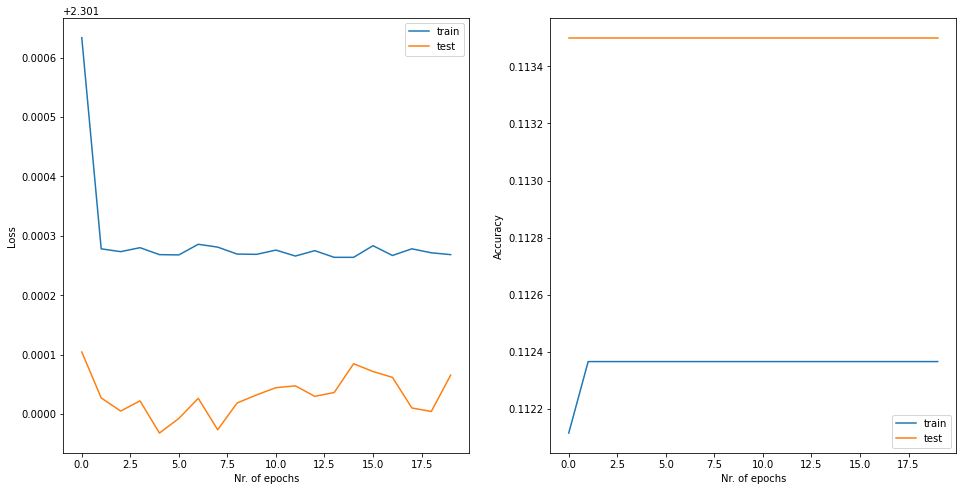

In [13]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.Zeros(), 'relu')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3479 - accuracy: 0.1077 - val_loss: 2.2936 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2914 - accuracy: 0.1240 - val_loss: 2.2798 - val_accuracy: 0.1135
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2762 - accuracy: 0.1605 - val_loss: 2.2527 - val_accuracy: 0.2255
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2404 - accuracy: 0.2732 - val_loss: 2.1716 - val_accuracy: 0.3764
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1264 - accuracy: 0.3894 - val_loss: 1.9179 - val_accuracy: 0.4337
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.8465 - accuracy: 0.4726 - val_loss: 1.5995 - val_accuracy: 0.5620
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5188 - accuracy: 0.5782 - val_loss: 1.2536 - val_accuracy:

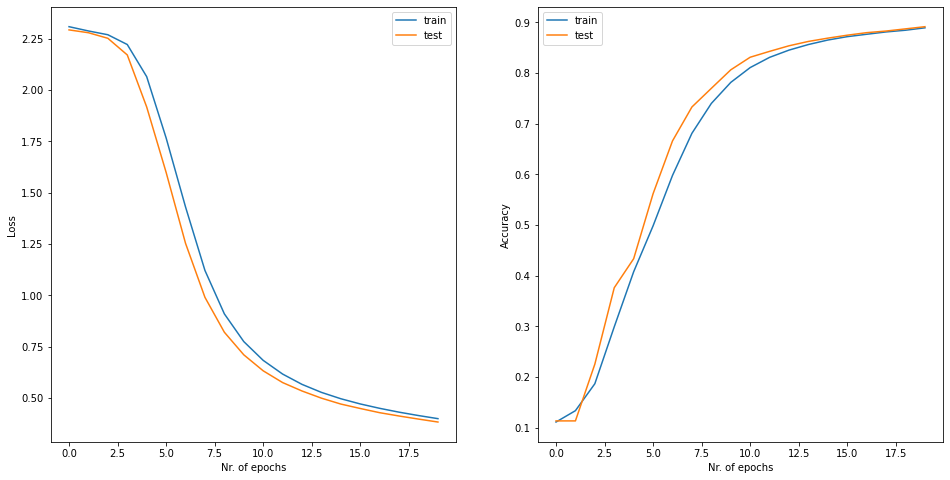

In [14]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.GlorotNormal(), 'sigmoid')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2683 - accuracy: 0.6136 - val_loss: 0.3300 - val_accuracy: 0.9045
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3125 - accuracy: 0.9082 - val_loss: 0.2493 - val_accuracy: 0.9290
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2535 - accuracy: 0.9278 - val_loss: 0.2137 - val_accuracy: 0.9385
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2092 - accuracy: 0.9383 - val_loss: 0.1840 - val_accuracy: 0.9461
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1807 - accuracy: 0.9462 - val_loss: 0.1659 - val_accuracy: 0.9501
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1639 - accuracy: 0.9521 - val_loss: 0.1522 - val_accuracy: 0.9547
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1463 - accuracy: 0.9575 - val_loss: 0.1440 - val_accuracy:

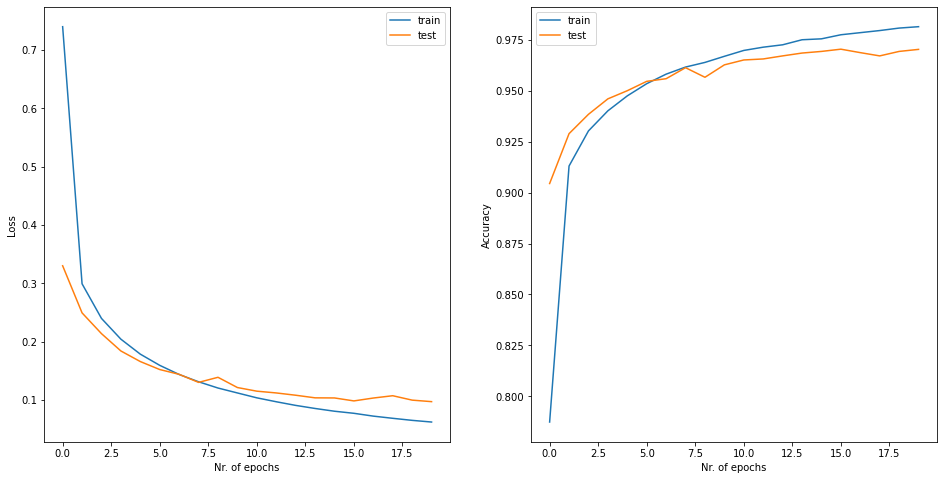

In [15]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.GlorotNormal(), 'relu')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 3.0758 - accuracy: 0.1795 - val_loss: 1.7725 - val_accuracy: 0.3936
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6784 - accuracy: 0.4296 - val_loss: 1.3879 - val_accuracy: 0.5345
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3243 - accuracy: 0.5608 - val_loss: 1.1361 - val_accuracy: 0.6317
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0973 - accuracy: 0.6407 - val_loss: 0.9804 - val_accuracy: 0.6754
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9667 - accuracy: 0.6841 - val_loss: 0.8775 - val_accuracy: 0.7095
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8692 - accuracy: 0.7166 - val_loss: 0.8057 - val_accuracy: 0.7308
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7999 - accuracy: 0.7411 - val_loss: 0.7515 - val_accuracy:

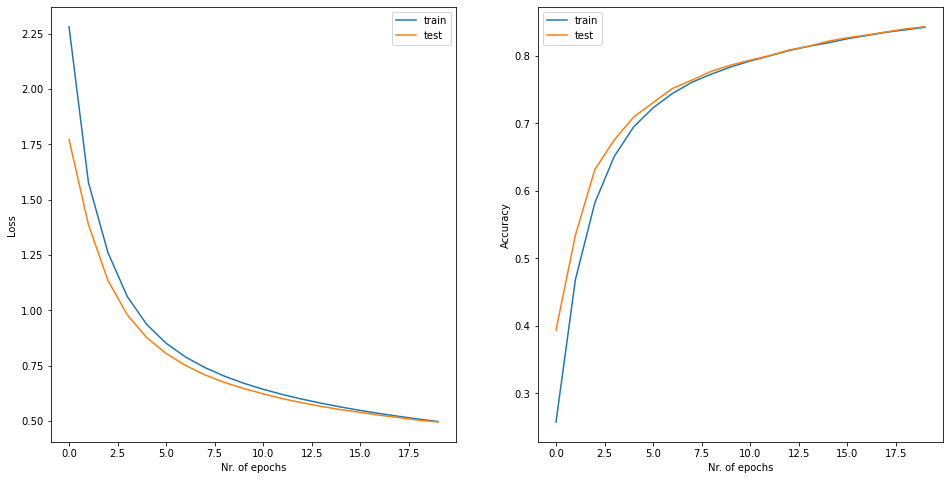

In [16]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.RandomNormal(mean=0, stddev=1), 'sigmoid')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 44.0912 - accuracy: 0.1152 - val_loss: 2.3176 - val_accuracy: 0.1137
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3055 - accuracy: 0.1140 - val_loss: 2.3093 - val_accuracy: 0.1136
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3020 - accuracy: 0.1122 - val_loss: 2.3086 - val_accuracy: 0.1136
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2973 - accuracy: 0.1124 - val_loss: 2.2856 - val_accuracy: 0.1137
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2552 - accuracy: 0.1270 - val_loss: 2.2447 - val_accuracy: 0.1386
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2069 - accuracy: 0.1502 - val_loss: 2.2113 - val_accuracy: 0.1576
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1878 - accuracy: 0.1583 - val_loss: 2.1920 - val_accuracy

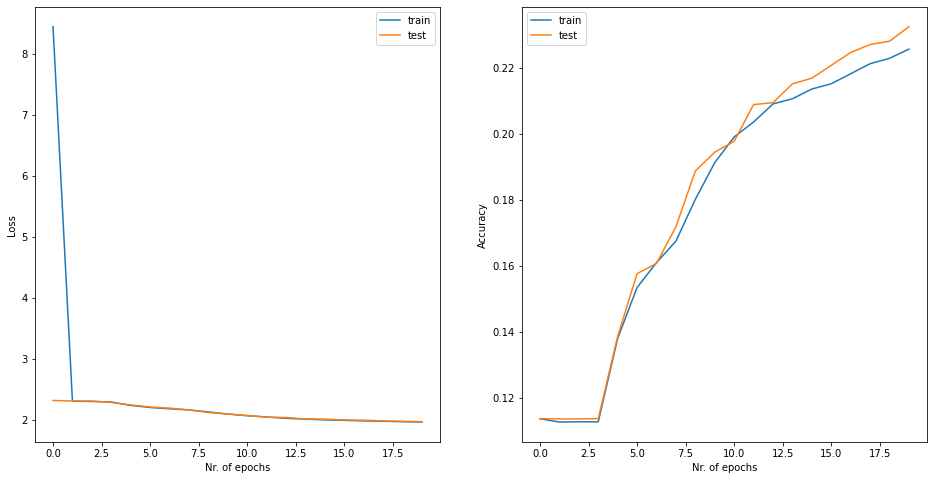

In [17]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.RandomNormal(mean=0, stddev=1), 'relu')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3590 - accuracy: 0.1299 - val_loss: 2.2533 - val_accuracy: 0.1765
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2327 - accuracy: 0.3010 - val_loss: 2.1160 - val_accuracy: 0.4571
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0366 - accuracy: 0.4250 - val_loss: 1.7053 - val_accuracy: 0.4812
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6005 - accuracy: 0.5255 - val_loss: 1.3010 - val_accuracy: 0.6391
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2308 - accuracy: 0.6352 - val_loss: 1.0218 - val_accuracy: 0.6887
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9777 - accuracy: 0.7090 - val_loss: 0.8444 - val_accuracy: 0.7694
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8197 - accuracy: 0.7694 - val_loss: 0.7209 - val_accuracy:

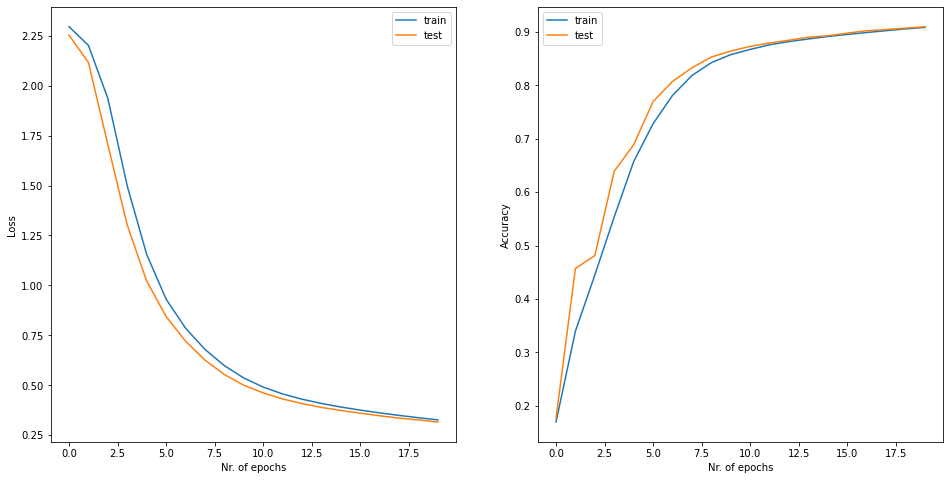

In [18]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.HeNormal(), 'sigmoid')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0263 - accuracy: 0.6739 - val_loss: 0.2986 - val_accuracy: 0.9105
Epoch 2/20
1875/1875 [==============================] - 2s 983us/step - loss: 0.2801 - accuracy: 0.9173 - val_loss: 0.2308 - val_accuracy: 0.9309
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2216 - accuracy: 0.9351 - val_loss: 0.1941 - val_accuracy: 0.9416
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1934 - accuracy: 0.9438 - val_loss: 0.1766 - val_accuracy: 0.9474
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1712 - accuracy: 0.9501 - val_loss: 0.1623 - val_accuracy: 0.9535
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1501 - accuracy: 0.9557 - val_loss: 0.1565 - val_accuracy: 0.9541
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1357 - accuracy: 0.9622 - val_loss: 0.1455 - val_accurac

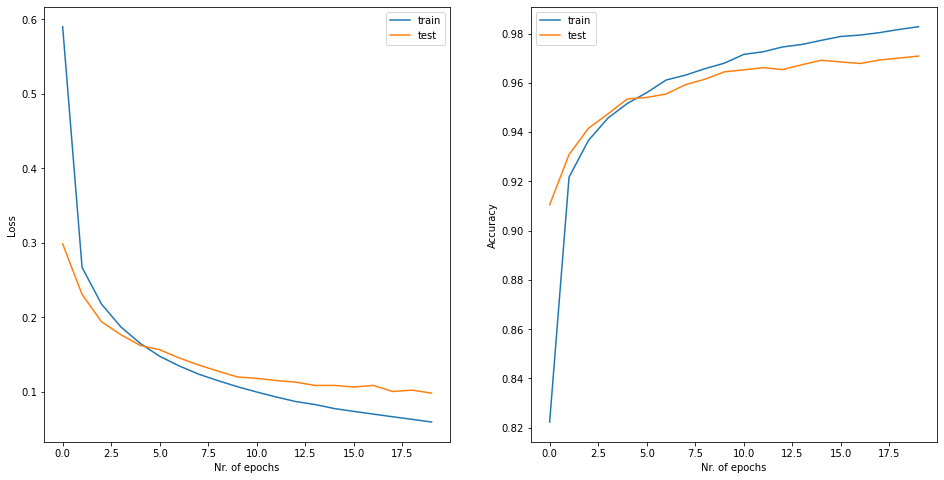

In [19]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.HeNormal(), 'relu')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### OUTPUTs

Provide here suitable plots and comments:

* Comparison of the different learning curves: 
    * train accuracy vs epochs for different models
    * train loss vs epochs for different models
    * test accuracy vs epochs for different models
    * test loss vs epochs for different models
    
Interpret the result and report your findings: Is it consistent with what you have learned in the lecture?

Are there ways (e.g. change in model) so that the effects of parameter initialisation become more clear?

##### Conclusion from the plots above
original: (default initialization for weights/bias and sigmoid function)
2 epochs = 15%
10 epochs = 75%
20 epochs = 88%

zero/sigmoid:
useless

zero/relu:
useless

glorotnormal/sigmoid:
same performance as original. (90% by the end)
Is glorothnormal the default?

glorothnormal/relu:
very steep learning curve (after epoch 2 alread better than glorotnormal/sigmoid with 20 epochs)
higher performance than the original. (96% by the end)

RandomNormal/sigmoid:
learn faster in the beginning as the original (steep learning curve), but results in a lower performance of around 83% in the end.

randomnormal/relu:
learns slower (in terms of steepness of the accuracy curve) than the original and has a lower overall performance of 73% after 20 epochs. On top of that, the accuracy of the test-set is very wiggly.

HeNormal/sigmoid:
steeper than the original version.
converges very fast after ~10 epochs.
This results in a performance of ~90% after 20 epochs, which is roughly equal to the default model.

HeNormal/relu:
Very steep learning curve.
Relative high performance after a low number of epochs. (5 epochs = ~95%)
Very good performance after 20 epochs (96-97%)

The two versions glorothnormal/relu and HeNormal/relu are by far the fastest learning models with the highest accuracy (~95%) after 20 epochs.

### Batch Normalisation

* No regularisation
* __Batch Norm__: with / without 
* __Parameter Initialisation: Random Normal (0,1), GlorotNormal__
* __Activation: Compare Sigmoid, ReLu__
* SGD with given batchsize and learning rate, no accelerators (no momentum nor RMS prop).

Run with/without batchnorm in combination with sigmoid or relu (with GlorotNormal).<br>
Run with/without batchnorm in combination with GlorotNormal or RandomNormal (with sigmoid).<br>
Hence run 8 different models.

In [25]:
def model_batchnorm(layersizes, initializer, activation):
    """
    Provides an MLP model (using Sequential) with given layersizes. The last layer is a softmax layer.
    As activation function use sigmoid.
        
    Arguments:
    layersizes -- list of integers with the number of hidden units per layer. The last element is for MNIST 10.
    initializer -- weight initializer
    activation -- string specifying the activation function to be used.
    """
    ### START YOUR CODE HERE ###

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    model.add(tf.keras.layers.Dense(units=layersizes[0],
                                    use_bias=True,
                                    activation=activation,
                                    name='Layer_{}'.format(0)))
    model.add(tf.keras.layers.BatchNormalization())
    
    for i, ls in enumerate(layersizes[1:-1]):
        model.add(tf.keras.layers.Dense(units=ls,
                                        use_bias=True,
                                        activation=activation,
                                        name='Layer_{}'.format(i+1)))
        model.add(tf.keras.layers.BatchNormalization())
        
    model.add(tf.keras.layers.Dense(units=layersizes[-1],
                                    use_bias=True,
                                    activation='softmax',
                                    name='Layer_{}'.format(len(layersizes)-1)))

    ### STOP YOUR CODE HERE ###

    return model

#### Run model

Run the different variants.

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 3.0852 - accuracy: 0.1766 - val_loss: 1.7658 - val_accuracy: 0.3966
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6825 - accuracy: 0.4306 - val_loss: 1.3969 - val_accuracy: 0.5439
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3592 - accuracy: 0.5582 - val_loss: 1.1719 - val_accuracy: 0.6180
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1451 - accuracy: 0.6293 - val_loss: 1.0263 - val_accuracy: 0.6676
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0204 - accuracy: 0.6707 - val_loss: 0.9261 - val_accuracy: 0.7015
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9279 - accuracy: 0.6992 - val_loss: 0.8506 - val_accuracy: 0.7245
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8572 - accuracy: 0.7247 - val_loss: 0.7936 - val_accuracy:

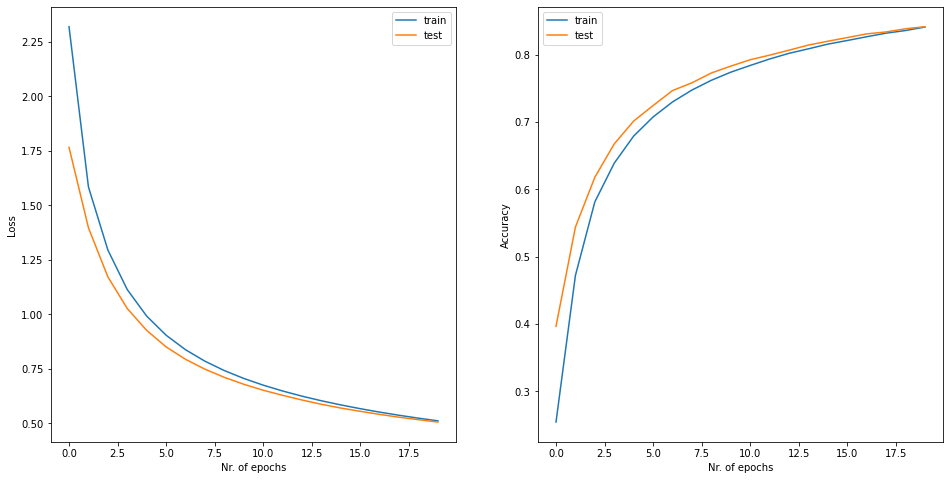

In [23]:
### START YOUR CODE HERE ###
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.RandomNormal(mean=0, stddev=1), 'sigmoid')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
### STOP YOUR CODE HERE ###

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6675 - accuracy: 0.8011 - val_loss: 0.2980 - val_accuracy: 0.9127
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3443 - accuracy: 0.8991 - val_loss: 0.2584 - val_accuracy: 0.9266
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2928 - accuracy: 0.9131 - val_loss: 0.2286 - val_accuracy: 0.9338
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2625 - accuracy: 0.9234 - val_loss: 0.1999 - val_accuracy: 0.9420
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2351 - accuracy: 0.9325 - val_loss: 0.1786 - val_accuracy: 0.9481
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2074 - accuracy: 0.9396 - val_loss: 0.1636 - val_accuracy: 0.9516
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1888 - accuracy: 0.9433 - val_loss: 0.1512 - val_accuracy:

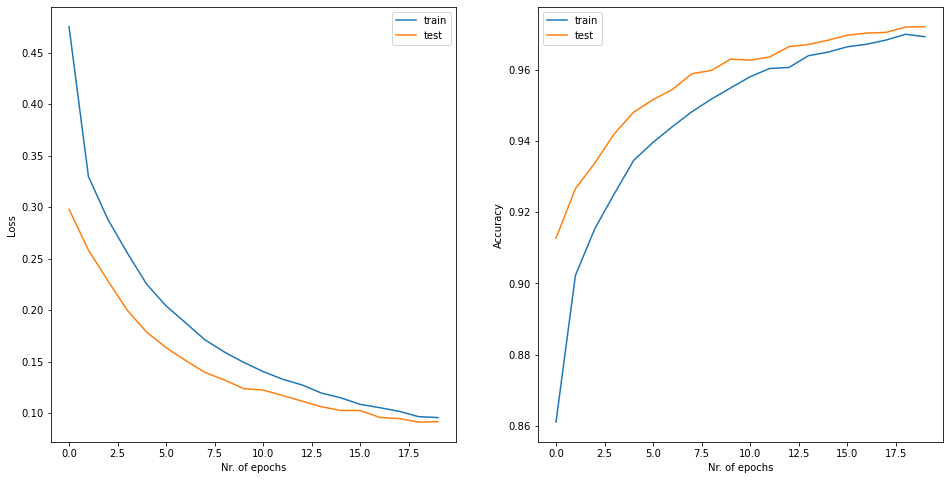

In [26]:
### START YOUR CODE HERE ###
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_batchnorm(layersizes, tf.keras.initializers.RandomNormal(mean=0, stddev=1), 'sigmoid')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
### STOP YOUR CODE HERE ###

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3352 - accuracy: 0.1084 - val_loss: 2.2934 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2914 - accuracy: 0.1278 - val_loss: 2.2801 - val_accuracy: 0.1680
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2737 - accuracy: 0.1673 - val_loss: 2.2441 - val_accuracy: 0.2873
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2267 - accuracy: 0.3089 - val_loss: 2.1191 - val_accuracy: 0.3939
Epoch 5/20
1875/1875 [==============================] - 2s 968us/step - loss: 2.0496 - accuracy: 0.3711 - val_loss: 1.7575 - val_accuracy: 0.4701
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6706 - accuracy: 0.4729 - val_loss: 1.3880 - val_accuracy: 0.5401
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3459 - accuracy: 0.5575 - val_loss: 1.2070 - val_accurac

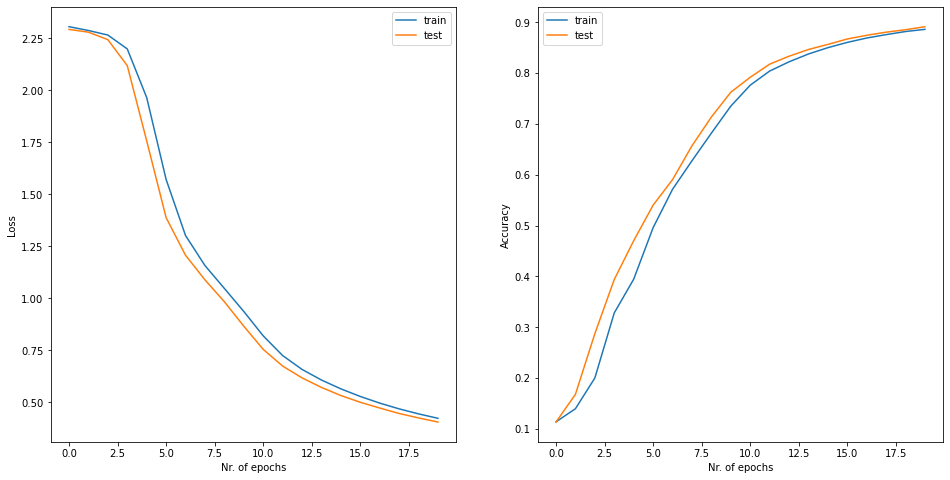

In [27]:
### START YOUR CODE HERE ###
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.GlorotNormal(), 'sigmoid')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
### STOP YOUR CODE HERE ###

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6790 - accuracy: 0.7935 - val_loss: 0.2996 - val_accuracy: 0.9132
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3264 - accuracy: 0.9054 - val_loss: 0.2533 - val_accuracy: 0.9268
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2906 - accuracy: 0.9137 - val_loss: 0.2323 - val_accuracy: 0.9325
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2546 - accuracy: 0.9257 - val_loss: 0.2015 - val_accuracy: 0.9421
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2271 - accuracy: 0.9339 - val_loss: 0.1822 - val_accuracy: 0.9463
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2058 - accuracy: 0.9389 - val_loss: 0.1619 - val_accuracy: 0.9521
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1861 - accuracy: 0.9456 - val_loss: 0.1519 - val_accuracy:

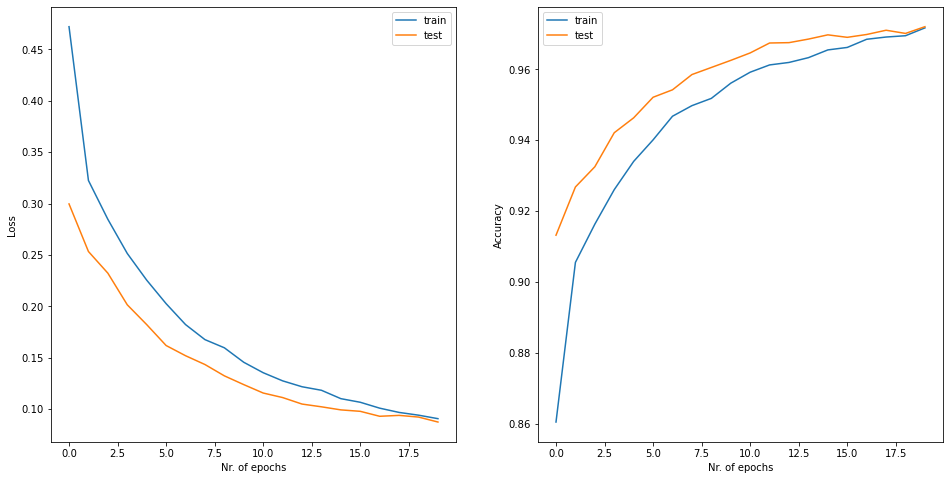

In [28]:
### START YOUR CODE HERE ###
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_batchnorm(layersizes, tf.keras.initializers.GlorotNormal(), 'sigmoid')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
### STOP YOUR CODE HERE ###

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 25.9062 - accuracy: 0.1145 - val_loss: 2.3168 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3089 - accuracy: 0.1148 - val_loss: 2.3090 - val_accuracy: 0.1135
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3024 - accuracy: 0.1104 - val_loss: 2.3080 - val_accuracy: 0.1135
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3021 - accuracy: 0.1137 - val_loss: 2.3072 - val_accuracy: 0.1135
Epoch 5/20
1875/1875 [==============================] - 2s 985us/step - loss: 2.3013 - accuracy: 0.1127 - val_loss: 2.3069 - val_accuracy: 0.1135
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3013 - accuracy: 0.1138 - val_loss: 2.3074 - val_accuracy: 0.1135
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3010 - accuracy: 0.1106 - val_loss: 2.3069 - val_accura

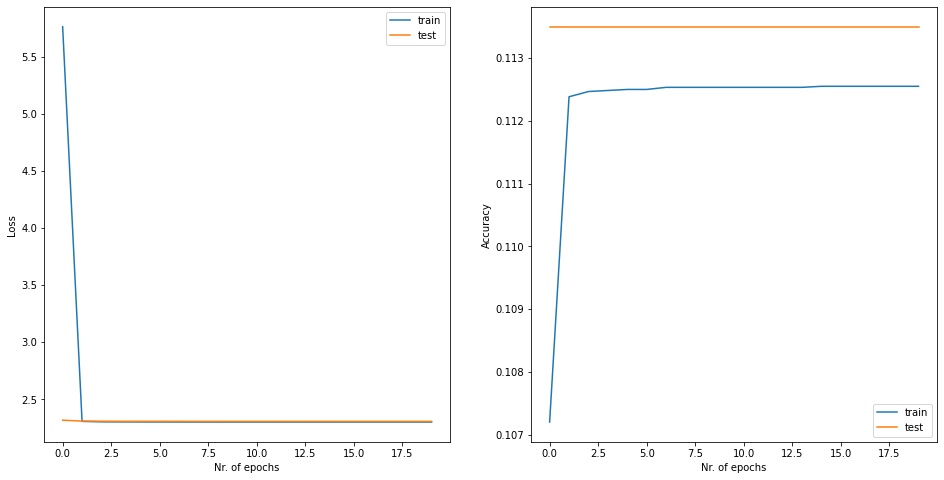

In [29]:
### START YOUR CODE HERE ###
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.RandomNormal(mean=0, stddev=1), 'relu')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
### STOP YOUR CODE HERE ###

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7046 - accuracy: 0.7855 - val_loss: 0.2045 - val_accuracy: 0.9376
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2461 - accuracy: 0.9273 - val_loss: 0.1626 - val_accuracy: 0.9526
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2005 - accuracy: 0.9406 - val_loss: 0.1349 - val_accuracy: 0.9585
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1719 - accuracy: 0.9486 - val_loss: 0.1240 - val_accuracy: 0.9627
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1520 - accuracy: 0.9551 - val_loss: 0.1133 - val_accuracy: 0.9640
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1403 - accuracy: 0.9575 - val_loss: 0.1116 - val_accuracy: 0.9649
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1238 - accuracy: 0.9636 - val_loss: 0.1039 - val_accuracy:

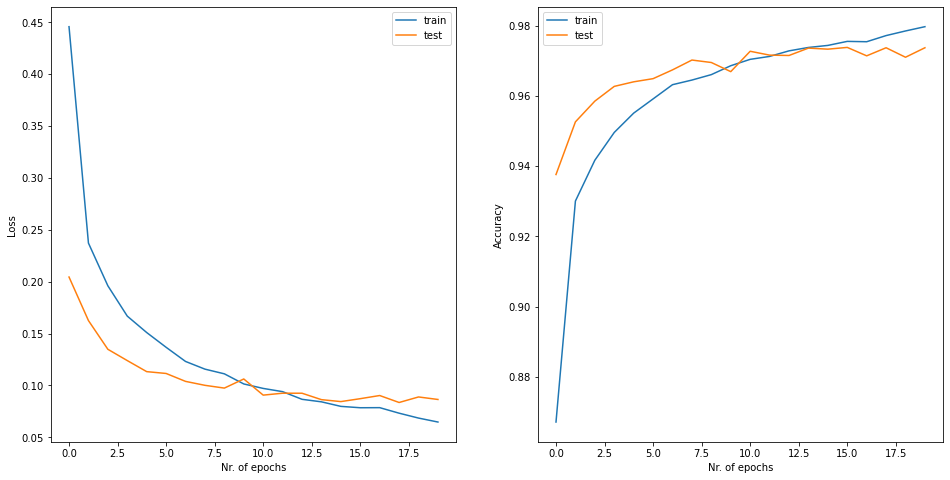

In [30]:
### START YOUR CODE HERE ###
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_batchnorm(layersizes, tf.keras.initializers.RandomNormal(mean=0, stddev=1), 'relu')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
### STOP YOUR CODE HERE ###

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2085 - accuracy: 0.6464 - val_loss: 0.3326 - val_accuracy: 0.9043
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3124 - accuracy: 0.9091 - val_loss: 0.2690 - val_accuracy: 0.9228
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2511 - accuracy: 0.9266 - val_loss: 0.2144 - val_accuracy: 0.9358
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2139 - accuracy: 0.9386 - val_loss: 0.1930 - val_accuracy: 0.9430
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1791 - accuracy: 0.9485 - val_loss: 0.1673 - val_accuracy: 0.9498
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1569 - accuracy: 0.9538 - val_loss: 0.1671 - val_accuracy: 0.9493
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1439 - accuracy: 0.9576 - val_loss: 0.1504 - val_accuracy:

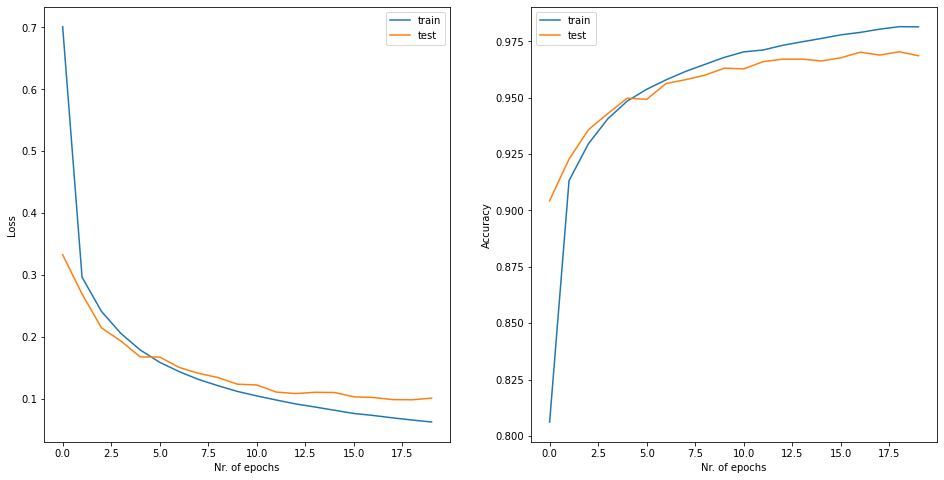

In [31]:
### START YOUR CODE HERE ###
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_param_init(layersizes, tf.keras.initializers.GlorotNormal(), 'relu')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
### STOP YOUR CODE HERE ###

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7033 - accuracy: 0.7886 - val_loss: 0.2029 - val_accuracy: 0.9377
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2474 - accuracy: 0.9270 - val_loss: 0.1544 - val_accuracy: 0.9516
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1962 - accuracy: 0.9405 - val_loss: 0.1304 - val_accuracy: 0.9589
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1636 - accuracy: 0.9508 - val_loss: 0.1177 - val_accuracy: 0.9644
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1440 - accuracy: 0.9571 - val_loss: 0.1159 - val_accuracy: 0.9650
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1337 - accuracy: 0.9595 - val_loss: 0.1082 - val_accuracy: 0.9670
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1247 - accuracy: 0.9624 - val_loss: 0.1004 - val_accuracy:

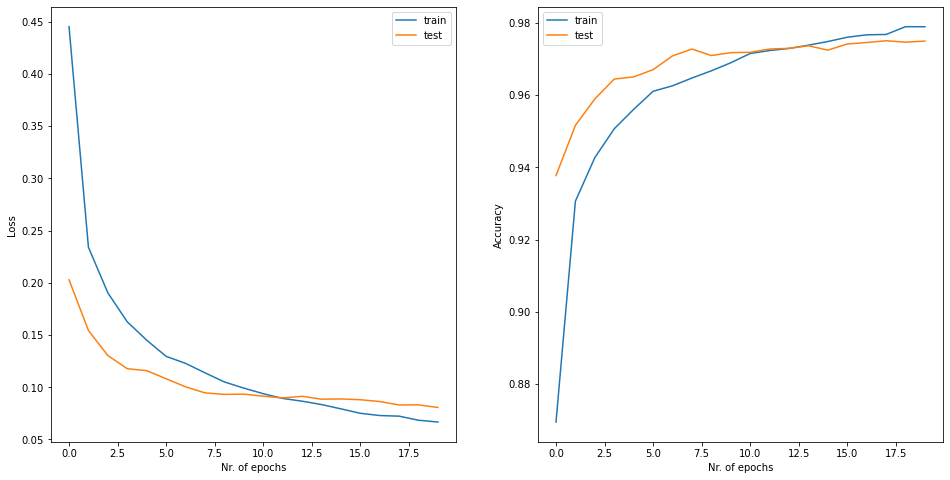

In [32]:
### START YOUR CODE HERE ###
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model
model = model_batchnorm(layersizes, tf.keras.initializers.GlorotNormal(), 'relu')
model.compile(optimizer="sgd",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
### STOP YOUR CODE HERE ###

#### OUTPUTs

Provide here suitable plots and comments:

* Comparison of the different learning curves: 
    * train accuracy vs epochs for different models
    * train loss vs epochs for different models
    * test accuracy vs epochs for different models
    * test loss vs epochs for different models
    
* Inspect the histograms of the activations and compare them for the different models.

* Find the max learning rate for the model with and without Batch Norm. 

Interpret the result and report your findings: Is it consistent with what you have learned in the lecture?

Are there ways (e.g. change in model) so that the effects of batch norm become more clear?

### Optimizers

* No regularisation
* No BatchNorm 
* Parameter Initialisation: GlorotNormal
* Activation: ReLu
* Optimizers: Compare 
    * SGD with given batchsize and learning rate, no accelerators (no momentum nor RMS prop)
    * RmsProp
    * Momentum

Create an according model and train it with the different optimizers.

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5867 - accuracy: 0.8109 - val_loss: 0.1585 - val_accuracy: 0.9519
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1528 - accuracy: 0.9527 - val_loss: 0.1299 - val_accuracy: 0.9611
Epoch 3/20
1875/1875 [==============================] - 2s 984us/step - loss: 0.1094 - accuracy: 0.9662 - val_loss: 0.1099 - val_accuracy: 0.9657
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0916 - accuracy: 0.9717 - val_loss: 0.1030 - val_accuracy: 0.9700
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0750 - accuracy: 0.9767 - val_loss: 0.1106 - val_accuracy: 0.9669
Epoch 6/20
1875/1875 [==============================] - 2s 953us/step - loss: 0.0642 - accuracy: 0.9796 - val_loss: 0.0914 - val_accuracy: 0.9718
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0570 - accuracy: 0.9809 - val_loss: 0.0984 - val_accur

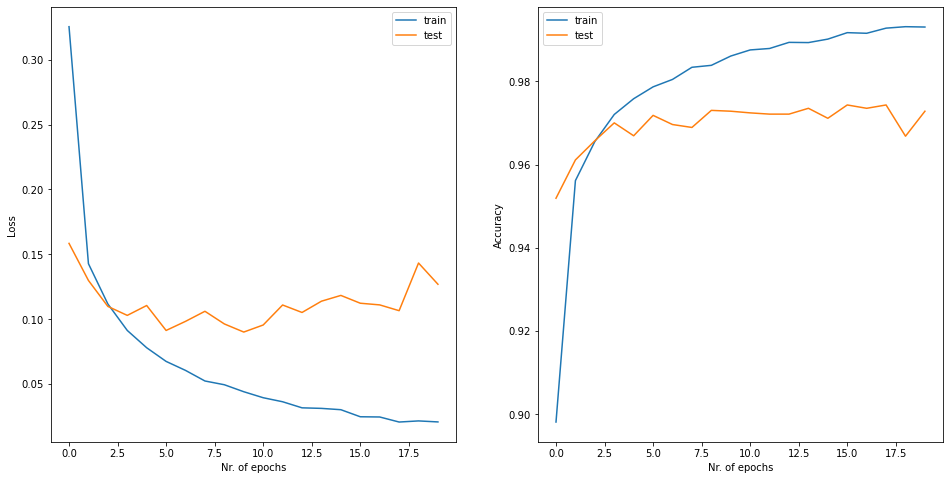

In [50]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model (SGD with given batchsize and learning rate, no accelerators (no momentum nor RMS prop))
model = model_param_init(layersizes, tf.keras.initializers.GlorotNormal(), 'relu')
model.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6068 - accuracy: 0.8018 - val_loss: 0.1807 - val_accuracy: 0.9435
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1633 - accuracy: 0.9493 - val_loss: 0.1439 - val_accuracy: 0.9568
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1124 - accuracy: 0.9650 - val_loss: 0.1208 - val_accuracy: 0.9636
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0901 - accuracy: 0.9728 - val_loss: 0.1099 - val_accuracy: 0.9654
Epoch 5/20
1875/1875 [==============================] - 2s 995us/step - loss: 0.0803 - accuracy: 0.9750 - val_loss: 0.1090 - val_accuracy: 0.9684
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0657 - accuracy: 0.9786 - val_loss: 0.1112 - val_accuracy: 0.9674
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0559 - accuracy: 0.9820 - val_loss: 0.0952 - val_accurac

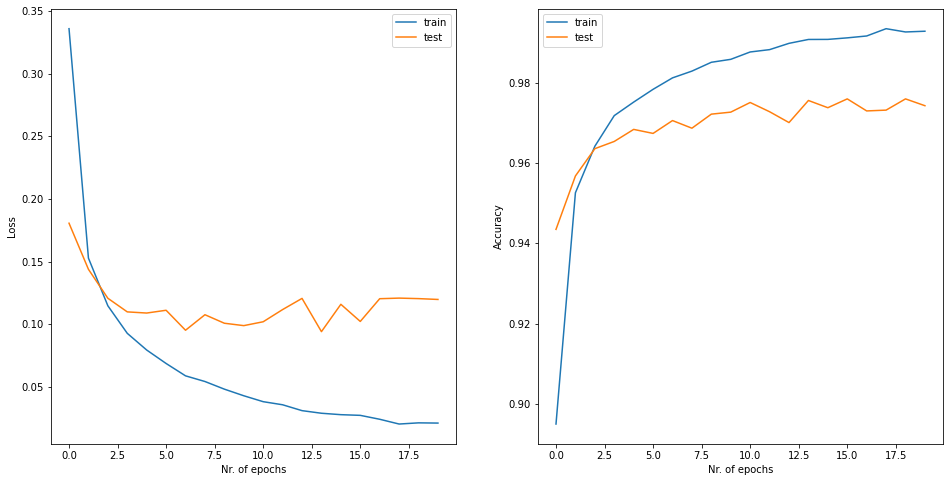

In [52]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model (RMS prop)
model = model_param_init(layersizes, tf.keras.initializers.GlorotNormal(), 'relu')
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5770 - accuracy: 0.8183 - val_loss: 0.1648 - val_accuracy: 0.9513
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1455 - accuracy: 0.9539 - val_loss: 0.1282 - val_accuracy: 0.9594
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1016 - accuracy: 0.9682 - val_loss: 0.0952 - val_accuracy: 0.9718
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0976 - val_accuracy: 0.9702
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0641 - accuracy: 0.9795 - val_loss: 0.0883 - val_accuracy: 0.9737
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0498 - accuracy: 0.9851 - val_loss: 0.0906 - val_accuracy: 0.9721
Epoch 7/20
1875/1875 [==============================] - 2s 987us/step - loss: 0.0491 - accuracy: 0.9850 - val_loss: 0.0900 - val_accurac

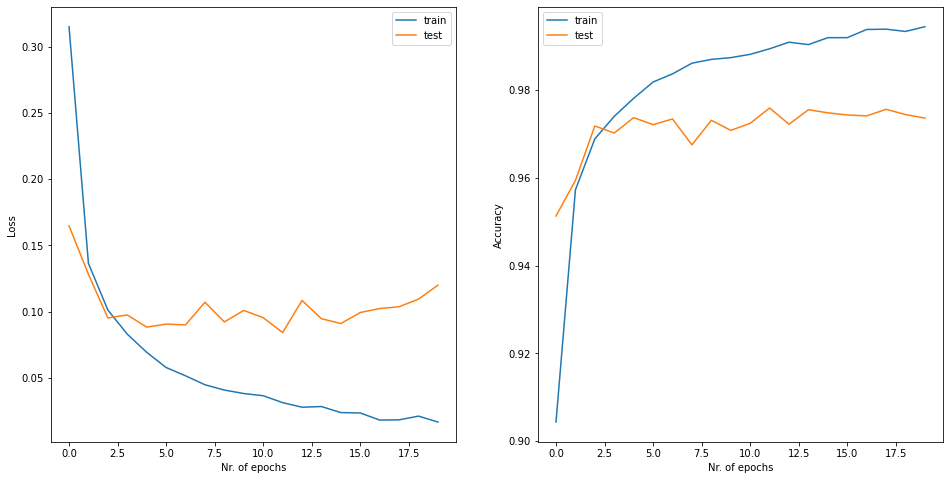

In [54]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model (RMS prop + Nesterov - Trying just for fun)
model = model_param_init(layersizes, tf.keras.initializers.GlorotNormal(), 'relu')
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 3244.2471 - accuracy: 0.1012 - val_loss: 2.4013 - val_accuracy: 0.1010
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3838 - accuracy: 0.1005 - val_loss: 2.4298 - val_accuracy: 0.0892
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3820 - accuracy: 0.1012 - val_loss: 2.3635 - val_accuracy: 0.0974
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3837 - accuracy: 0.1021 - val_loss: 2.4224 - val_accuracy: 0.1135
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3852 - accuracy: 0.1018 - val_loss: 2.3926 - val_accuracy: 0.1009
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3822 - accuracy: 0.1011 - val_loss: 2.3556 - val_accuracy: 0.0980
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3846 - accuracy: 0.1003 - val_loss: 2.3574 - val_accura

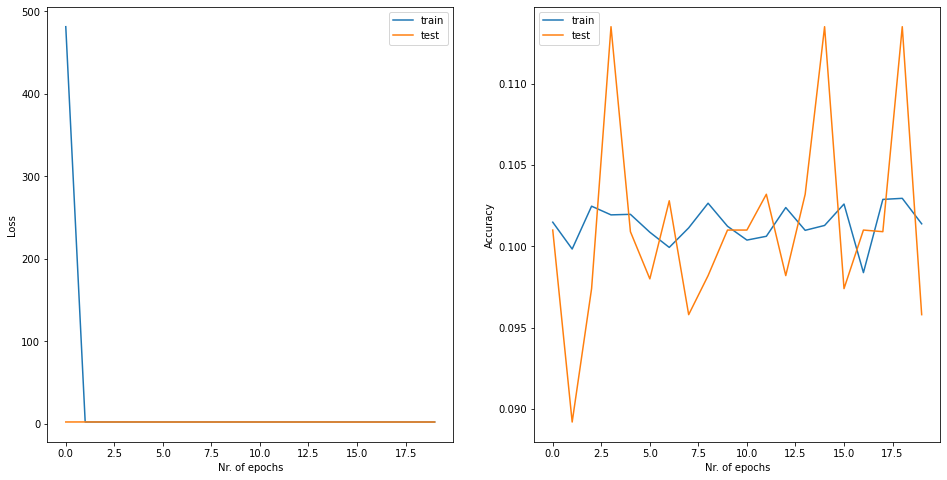

In [61]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model (RMS prop + Momentum)
model = model_param_init(layersizes, tf.keras.initializers.GlorotNormal(), 'relu')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.5),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3077 - accuracy: 0.5838 - val_loss: 0.3231 - val_accuracy: 0.9092
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3132 - accuracy: 0.9119 - val_loss: 0.2611 - val_accuracy: 0.9278
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2468 - accuracy: 0.9294 - val_loss: 0.2216 - val_accuracy: 0.9377
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2147 - accuracy: 0.9393 - val_loss: 0.1945 - val_accuracy: 0.9447
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1885 - accuracy: 0.9450 - val_loss: 0.1791 - val_accuracy: 0.9467
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1713 - accuracy: 0.9497 - val_loss: 0.1624 - val_accuracy: 0.9509
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1499 - accuracy: 0.9572 - val_loss: 0.1616 - val_accuracy:

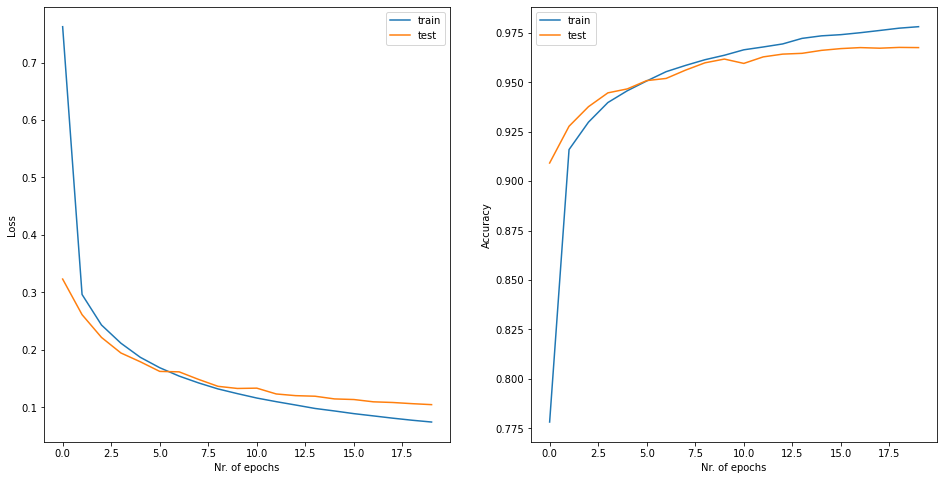

In [62]:
# this duplicated code could be defined in a function, but I am too lazy right now...

# fit model (Adam -state of the art - just for fun)
model = model_param_init(layersizes, tf.keras.initializers.GlorotNormal(), 'relu')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001*learning_rate),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batchsize,
                    epochs=epochs)

# plot
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Nr. of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### OUTPUTs

TODO: 
* Comparison of the different learning curves: 
    * train accuracy vs epochs for optimizers
    * train loss vs epochs for optimizers
    * test accuracy vs epochs for optimizers
    * test loss vs epochs for optimizers
    
Interpret the result and report your findings: Is it consistent with what you have learned in the lecture?

Are there ways (e.g. change in model) so that the effects of the different optimizers become more clear?

##### Conclusion
###### SGD with given batchsize and learning rate, no accelerators (no momentum nor RMS prop)
- Overall very nice results
- Steep descending loss function, which is converging towards 0
- Steep ascending accuracy function, which is converging towards 97% after 20 epochs.

###### RmsProp
- Overall very nice curves
- Super steep learning curve, which converges relativly fast to around 97% after 7-20 epochs

###### RMS prop + Nesterov
- Overall very nice curves
- Super steep learning curve, which converges relativly fast to around 97% after 3-20 epochs
- Nesterov has speed up the training, so the validation curve does not improve after ~3-4 epochs

###### RMS prop + Momentum
- Unusable curves
- Urgent need for better parameters.

###### Adam
- Overall best curves
- Very steep ascending learning curve in the first three epochs
- Converges to ~96% after 20 epochs
- Very smooth train/test curves -> Robust
